In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Encontrar o path onde estão armazenadas as funções
import sys
sys.path.insert(0, '../')
from src_23.utils.plots import plotar_resultados,plot_strategy_predictions, plot_strategy_errors
from src_23.utils.data_convertion import *
from src_23.models.predict_model import *
from src_23.models.model_evaluation import *


In [3]:
df = pd.read_csv('../data/preprocessed/covid_19_preprocessed.csv',
                parse_dates = ['ObservationDate']).drop(['Unnamed: 0'],axis=1).set_index('ObservationDate')
df.head()

,Confirmed,Recovered,Deaths,New_Confirmed,New_Recovered,New_Deaths,Confirmed_rate,Recovered_rate,Deaths_rate,Reproduction_rate
ObservationDate,,,,,,,,,,
2020-02-26,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2020-02-27,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-28,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-29,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2020-03-01,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# ARIMA

$$ ARIMA(p,d,q) : \left( 1 - \displaystyle\sum_{i=1}^p \phi_i \mathbf{B}^i\right)(1-\mathbf{B})^d X_t = c + \left ( 1 + \displaystyle\sum_{i=1}^q \eta_j \mathbf{B}^i\right)\epsilon_t $$

------------------------------------------------------------------------------------------------------------------------------------------------------
ADF Statistic: 0.7456027010201807
p-value: 0.9907053641275179
Critical Values:
	1%: -3.532
	5%: -2.906
	10%: -2.590
A série temporal não é estacionária.
------------------------------------------------------------------------------------------------------------------------------------------------------


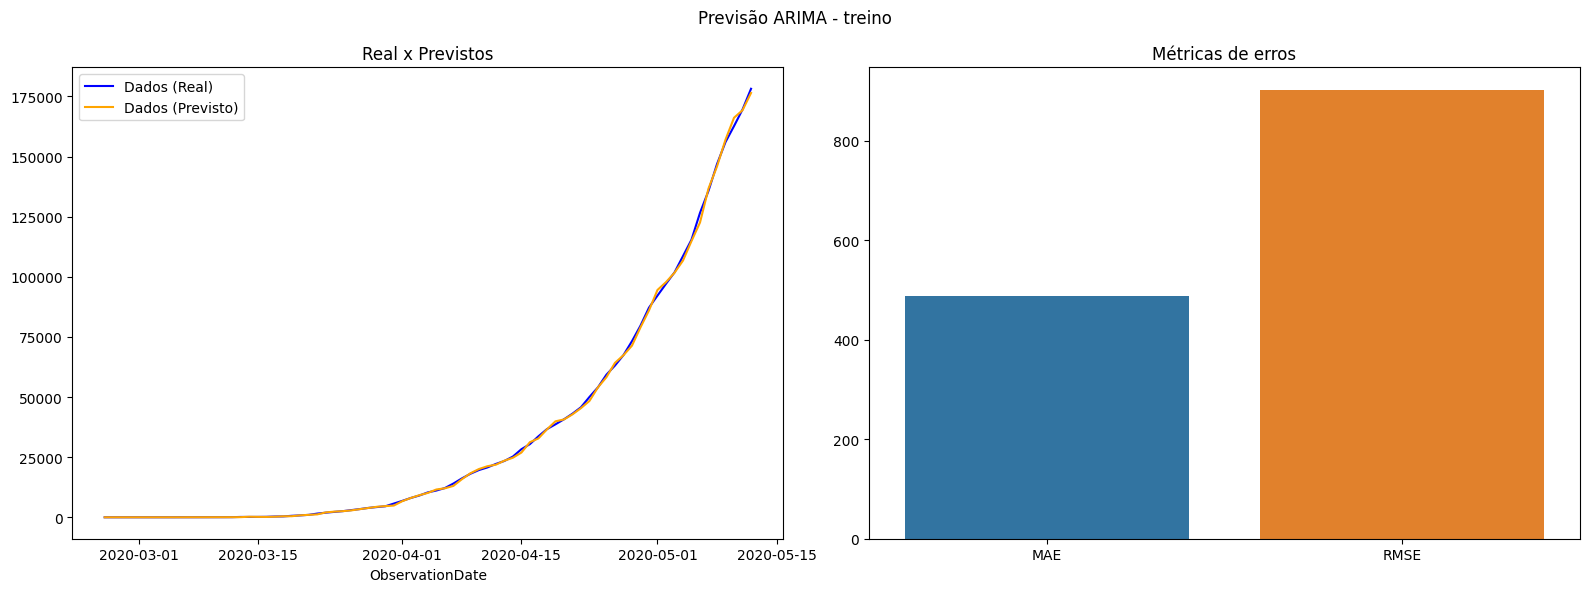

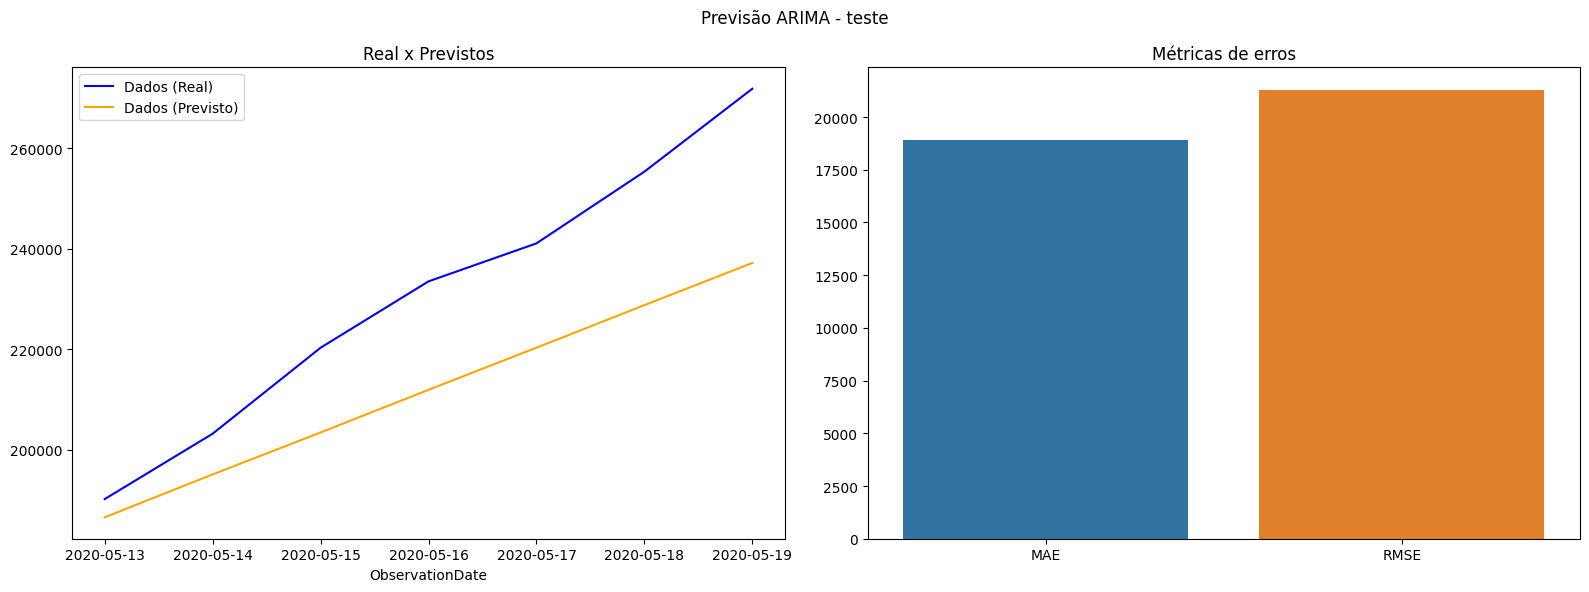

In [4]:
dados_usados = df['Confirmed']

train_results, test_results, train_error, test_error = pipeline_arima(dados_usados,dias_teste=7)

------------------------------------------------------------------------------------------------------------------------------------------------------
ADF Statistic: 4.80402214069415
p-value: 1.0
Critical Values:
	1%: -3.537
	5%: -2.908
	10%: -2.591
A série temporal não é estacionária.
------------------------------------------------------------------------------------------------------------------------------------------------------


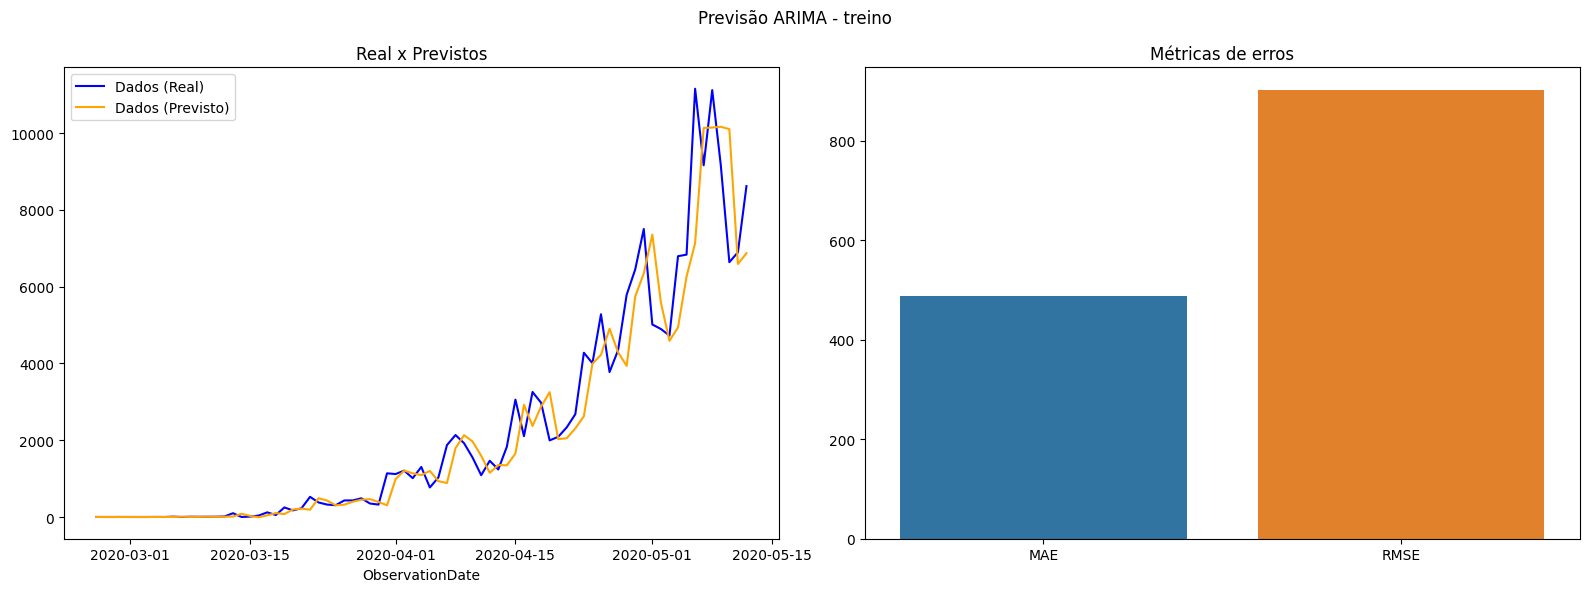

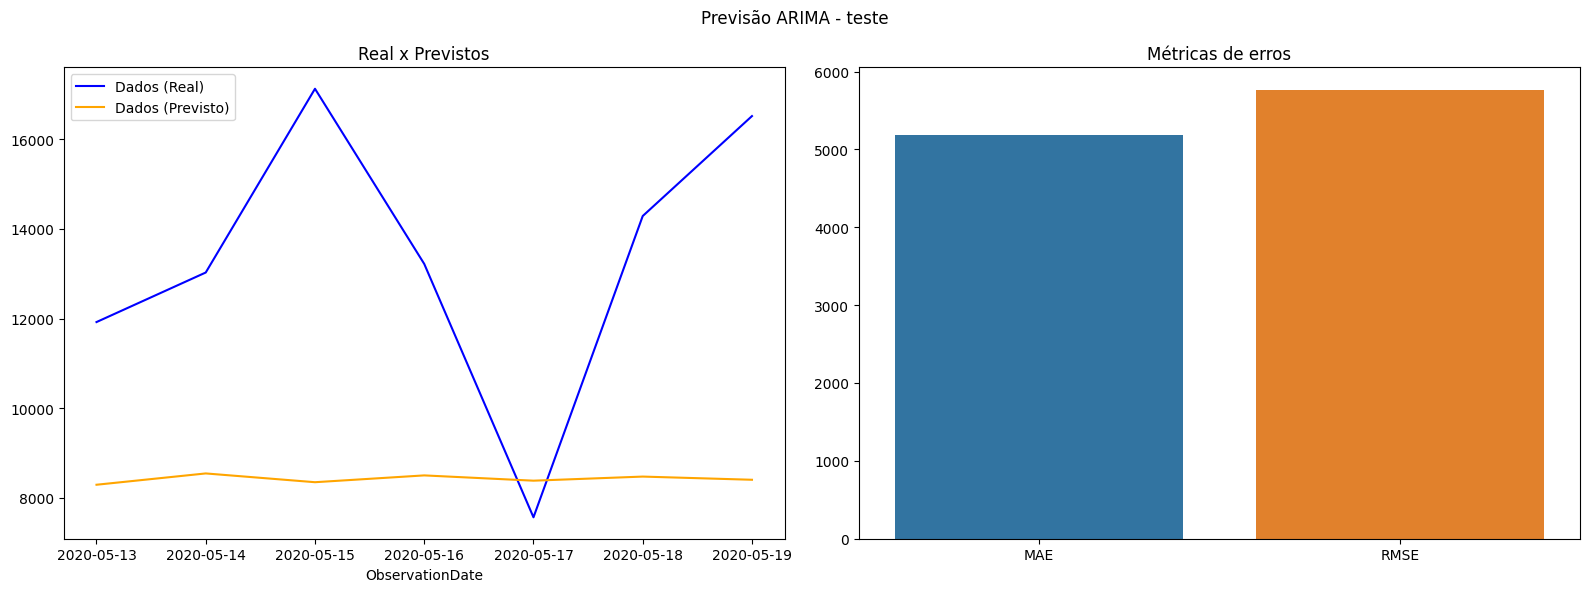

In [5]:
dados_usados = df['New_Confirmed']

train_results_1, test_results_1, _, _ = pipeline_arima(dados_usados,dias_teste=7)

------------------------------------------------------------------------------------------------------------------------------------------------------
ADF Statistic: -0.7768315353328805
p-value: 0.8258330846974313
Critical Values:
	1%: -3.530
	5%: -2.905
	10%: -2.590
A série temporal não é estacionária.
------------------------------------------------------------------------------------------------------------------------------------------------------


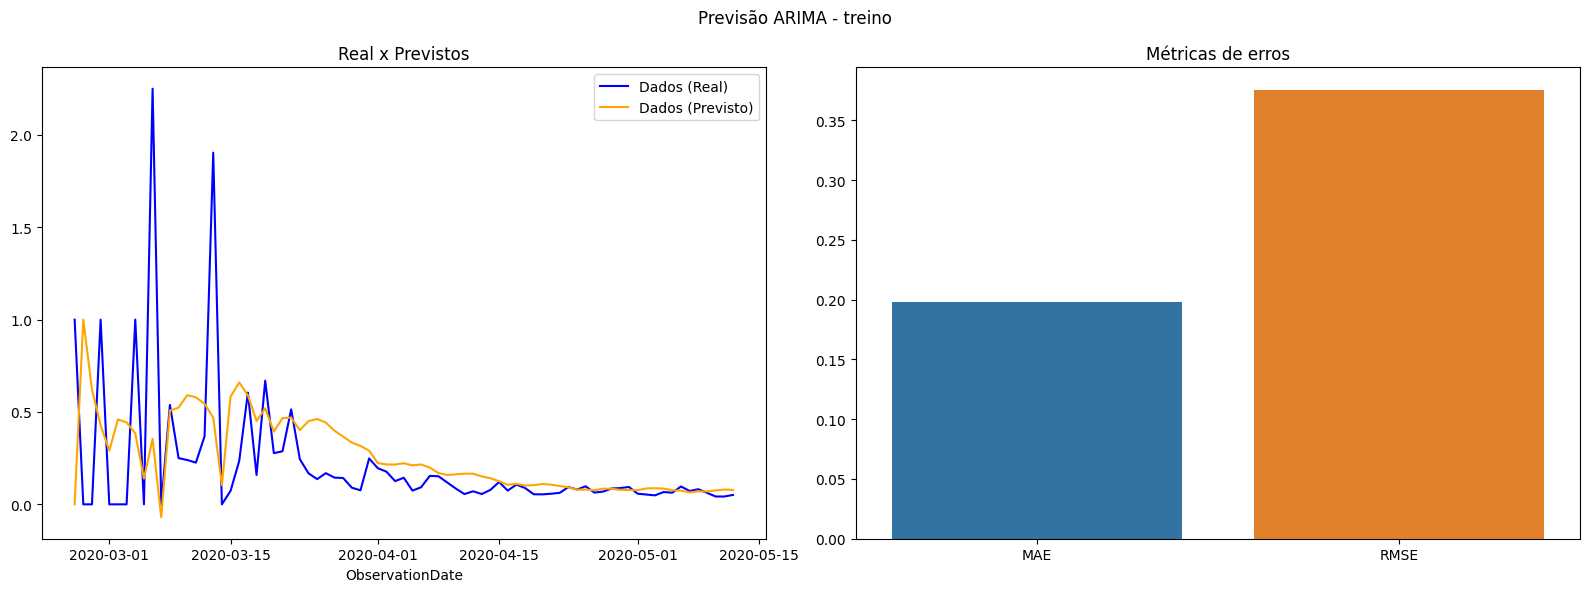

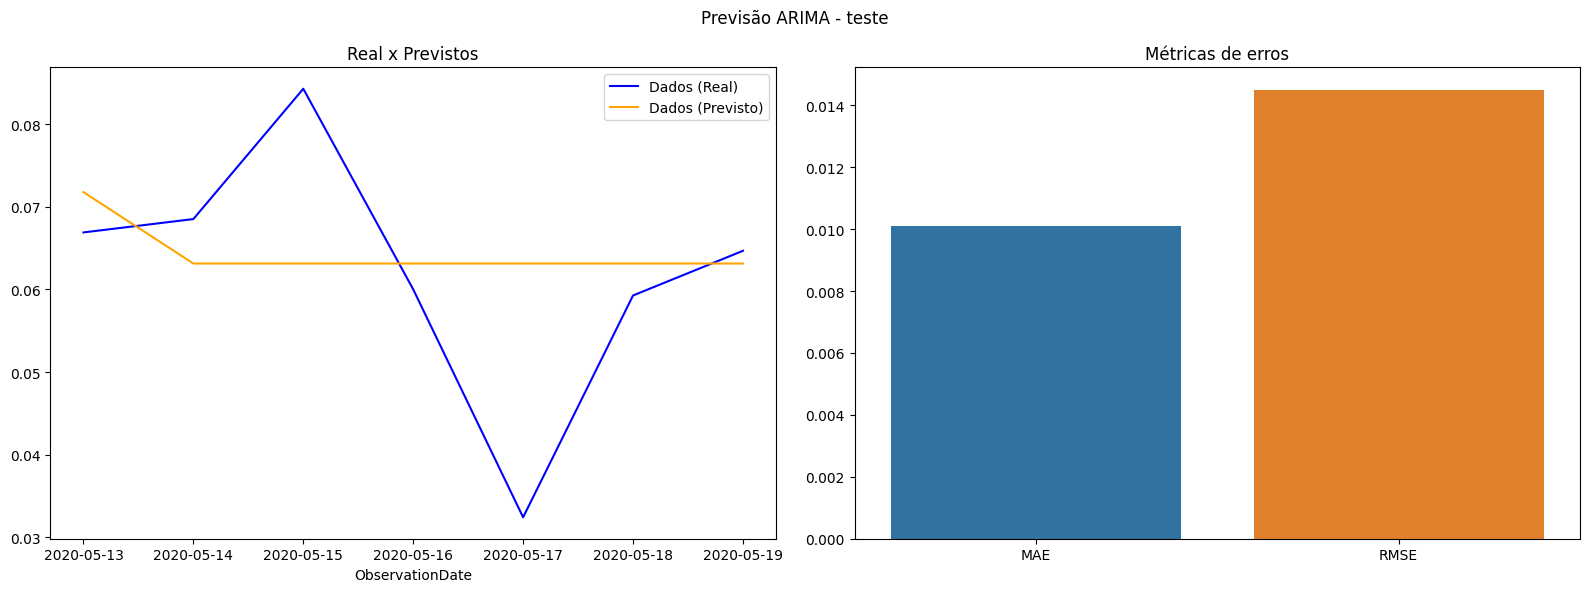

In [6]:
dados_usados = df['Confirmed_rate']

train_results_2, test_results_2, _, _ = pipeline_arima(dados_usados,dias_teste=7)

# Conversão para mesma escala

In [7]:
cumulative_predictions = convert_2_cumulative(train_results,test_results,test_results_1,test_results_2)
cumulative_predictions

,Confirmed,Confirmed_direct,Confirmed_d2c,Confirmed_r2c
2020-05-13,190137.0,186508.898859,186508.975068,191006.491615
2020-05-14,203165.0,195056.118296,195056.158869,203066.414569
2020-05-15,220291.0,203407.504295,203407.636930,215887.786729
2020-05-16,233511.0,211910.882398,211910.976254,229518.685095
2020-05-17,241080.0,220296.294949,220296.476197,244010.222190
2020-05-18,255368.0,228773.264042,228773.415651,259416.737720
2020-05-19,271885.0,237179.173404,237179.401031,275796.002337


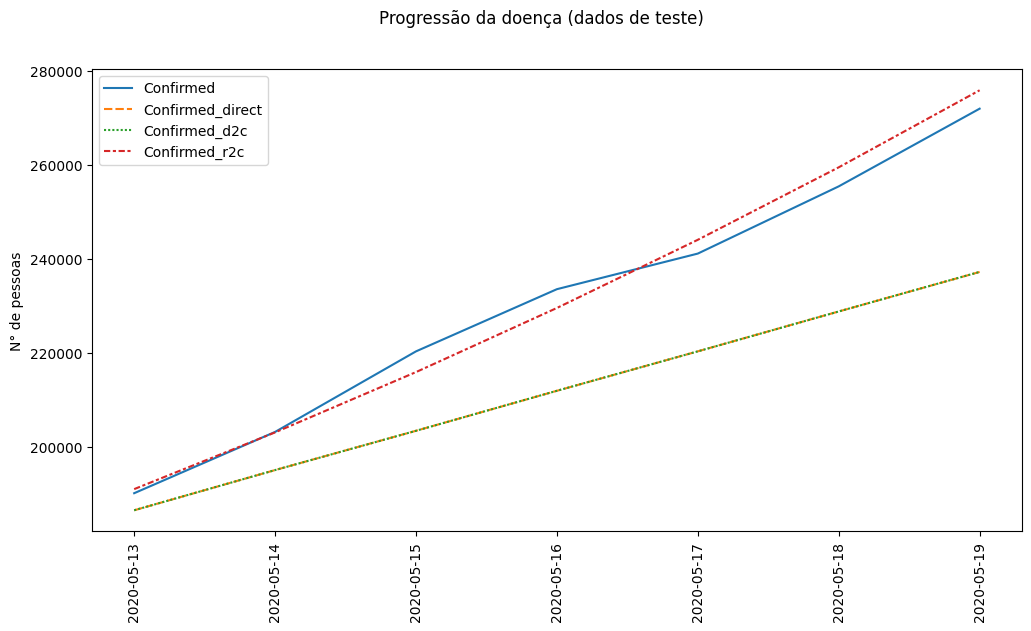

In [8]:
plot_strategy_predictions(cumulative_predictions)

In [9]:
cumulative_errors = errors_in_models(cumulative_predictions)
cumulative_errors

,Strategy,MAE,RMSE
0,Confirmed_direct,18900.694823,21294.772545
1,Confirmed_d2c,18900.565714,21294.634542
2,Confirmed_r2c,2893.366781,3302.964440


As estratégias usadas na previsão possuem valores similares para:

- Previsão direta
- Previsão utilizando valores diários (convertidos em cumulativos)

---

A previsão com **menores erros** para o intervalo de tempo escolhido, foi a que utiliza as suas taxas convertidas para valores cumulativos (r2c).

Para a escala a **nível nacional**, os erros MAE e RMSE possuem valores aceitáveis dado o volume e complexidade do desafio.


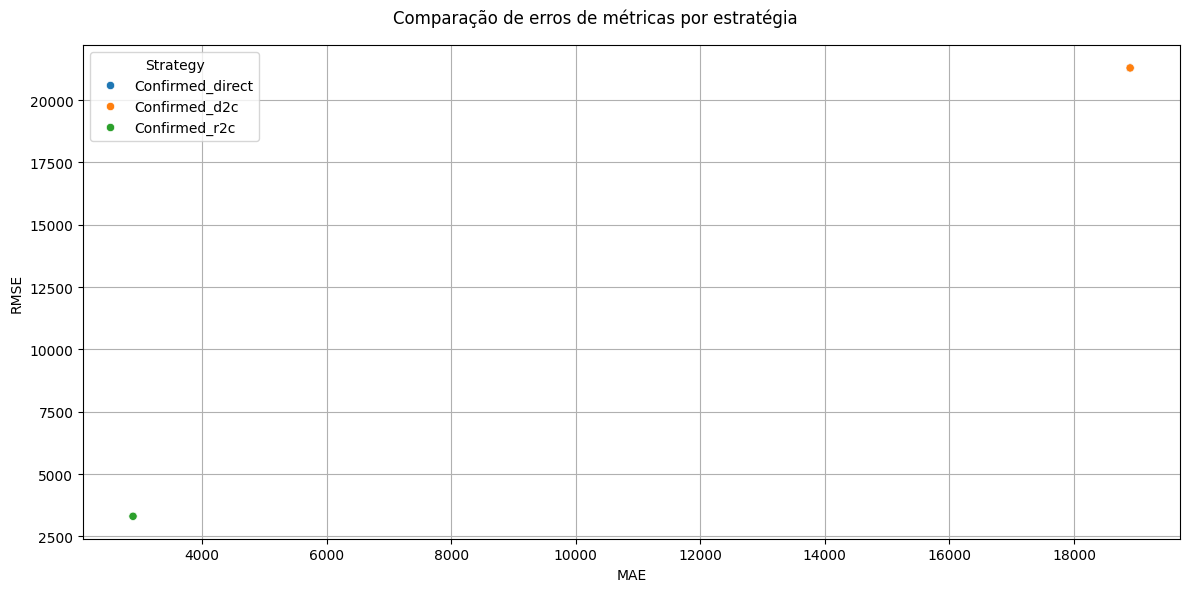

In [10]:
plot_strategy_errors(cumulative_errors)